<a href="https://colab.research.google.com/github/kabeerbora/1st_global/blob/main/1st_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
sheet_id = '1ziZc1OlSzIDhxmq1RtDbf_HQUHw_LPFoWQdoxuREc-4'
sheet_name = 'Sheet4'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)
df

In [ ]:
df['profits'] = df['rop']*df['Fixed_capital_stock']
df['profit_share'] = df['profits']/df['GDP']

,profit_share
0,2.212711e-01
1,2.380567e-01
2,2.362149e-01
3,2.210275e-01
4,2.327568e-01
...,...
303,7.185711e-09
304,6.130640e-09
305,6.117398e-09
306,6.923638e-09


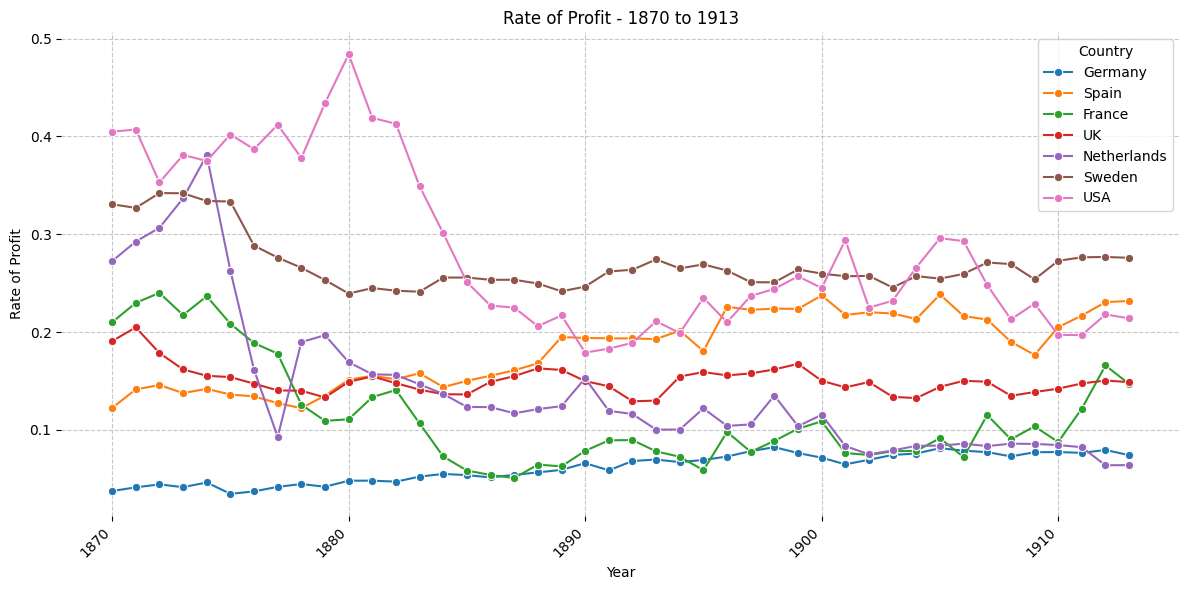

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='rop', hue='Country', data=df, marker='o')
plt.title('Rate of Profit - 1870 to 1913')
plt.xlabel('Year')
plt.ylabel('Rate of Profit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [ ]:
sheet_id = '1T_76VszKnPgAEm02BJl8mTmNc0hlOzMs'
sheet_name = 'Sheet1'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df_open = pd.read_csv(url)
df_open

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.0000,3273.239437,13.836157,21.449734,208.78,0.109266,...,-0.070045,0.071417,NaN,NaN,NaN,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,AUS,193,1675.0000,3298.507463,13.936864,19.930801,211.56,0.104579,...,0.041654,0.065466,NaN,NaN,NaN,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,AUS,193,1722.0000,3553.426249,15.044247,21.085006,227.40,0.130438,...,0.108945,0.062997,NaN,NaN,NaN,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,AUS,193,1769.0000,3823.629169,16.219443,23.254910,266.54,0.124986,...,0.083086,0.064484,NaN,NaN,NaN,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,AUS,193,1822.0000,3834.796926,16.268228,23.458050,287.58,0.141960,...,0.119389,0.063503,NaN,NaN,NaN,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,USA,111,322701.2464,33012.767870,108.756035,108.051774,18695.10,0.195831,...,0.014868,0.021309,NaN,NaN,NaN,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,USA,111,324756.9354,33543.679860,110.591099,109.978043,19479.60,0.204547,...,0.170363,0.019363,NaN,NaN,NaN,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,USA,111,326497.1326,34338.770760,113.306861,112.567306,20527.20,0.208586,...,0.121093,0.018716,NaN,NaN,NaN,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,USA,111,328018.6819,34961.835050,115.229692,114.509456,21372.60,0.210205,...,0.061144,0.019312,NaN,NaN,NaN,0.021442,0.020492,0.080606,0.084776,0.070134


In [ ]:
df_open = df_open[df_open['year'] <= 1913]

In [ ]:
iso_list = ['AUS', 'BEL', 'CAN', 'CHE', 'DEU', 'DNK', 'ESP', 'FIN', 'FRA', 'GBR', 'ITA', 'JPN', 'NLD', 'NOR', 'PRT', 'SWE', 'USA']
df_open = df_open[df_open['iso'].isin(iso_list)]
df_open

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.0,3273.239437,13.836157,21.449734,208.780,0.109266,...,-0.070045,0.071417,NaN,NaN,NaN,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,AUS,193,1675.0,3298.507463,13.936864,19.930801,211.560,0.104579,...,0.041654,0.065466,NaN,NaN,NaN,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,AUS,193,1722.0,3553.426249,15.044247,21.085006,227.400,0.130438,...,0.108945,0.062997,NaN,NaN,NaN,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,AUS,193,1769.0,3823.629169,16.219443,23.254910,266.540,0.124986,...,0.083086,0.064484,NaN,NaN,NaN,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,AUS,193,1822.0,3834.796926,16.268228,23.458050,287.580,0.141960,...,0.119389,0.063503,NaN,NaN,NaN,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,1909,USA,USA,111,90845.0,5017.495988,13.492952,16.758800,32.540,0.160776,...,0.140642,0.042718,NaN,NaN,NaN,0.038975,0.048726,0.103129,0.104883,0.026412
2607,1910,USA,USA,111,92767.0,4963.735703,13.267110,16.874700,33.746,0.160988,...,-0.121359,0.051934,NaN,NaN,NaN,0.039742,0.045631,0.054466,0.054903,0.035490
2608,1911,USA,USA,111,94234.0,5045.683904,13.479835,16.537400,34.675,0.142187,...,0.006630,0.051592,NaN,NaN,NaN,0.040075,0.051934,0.044636,0.044864,0.034810
2609,1912,USA,USA,111,95703.0,5200.698473,14.047947,16.890300,37.745,0.149492,...,0.029638,0.051173,NaN,NaN,NaN,0.044133,0.052689,0.091431,0.092914,0.027606


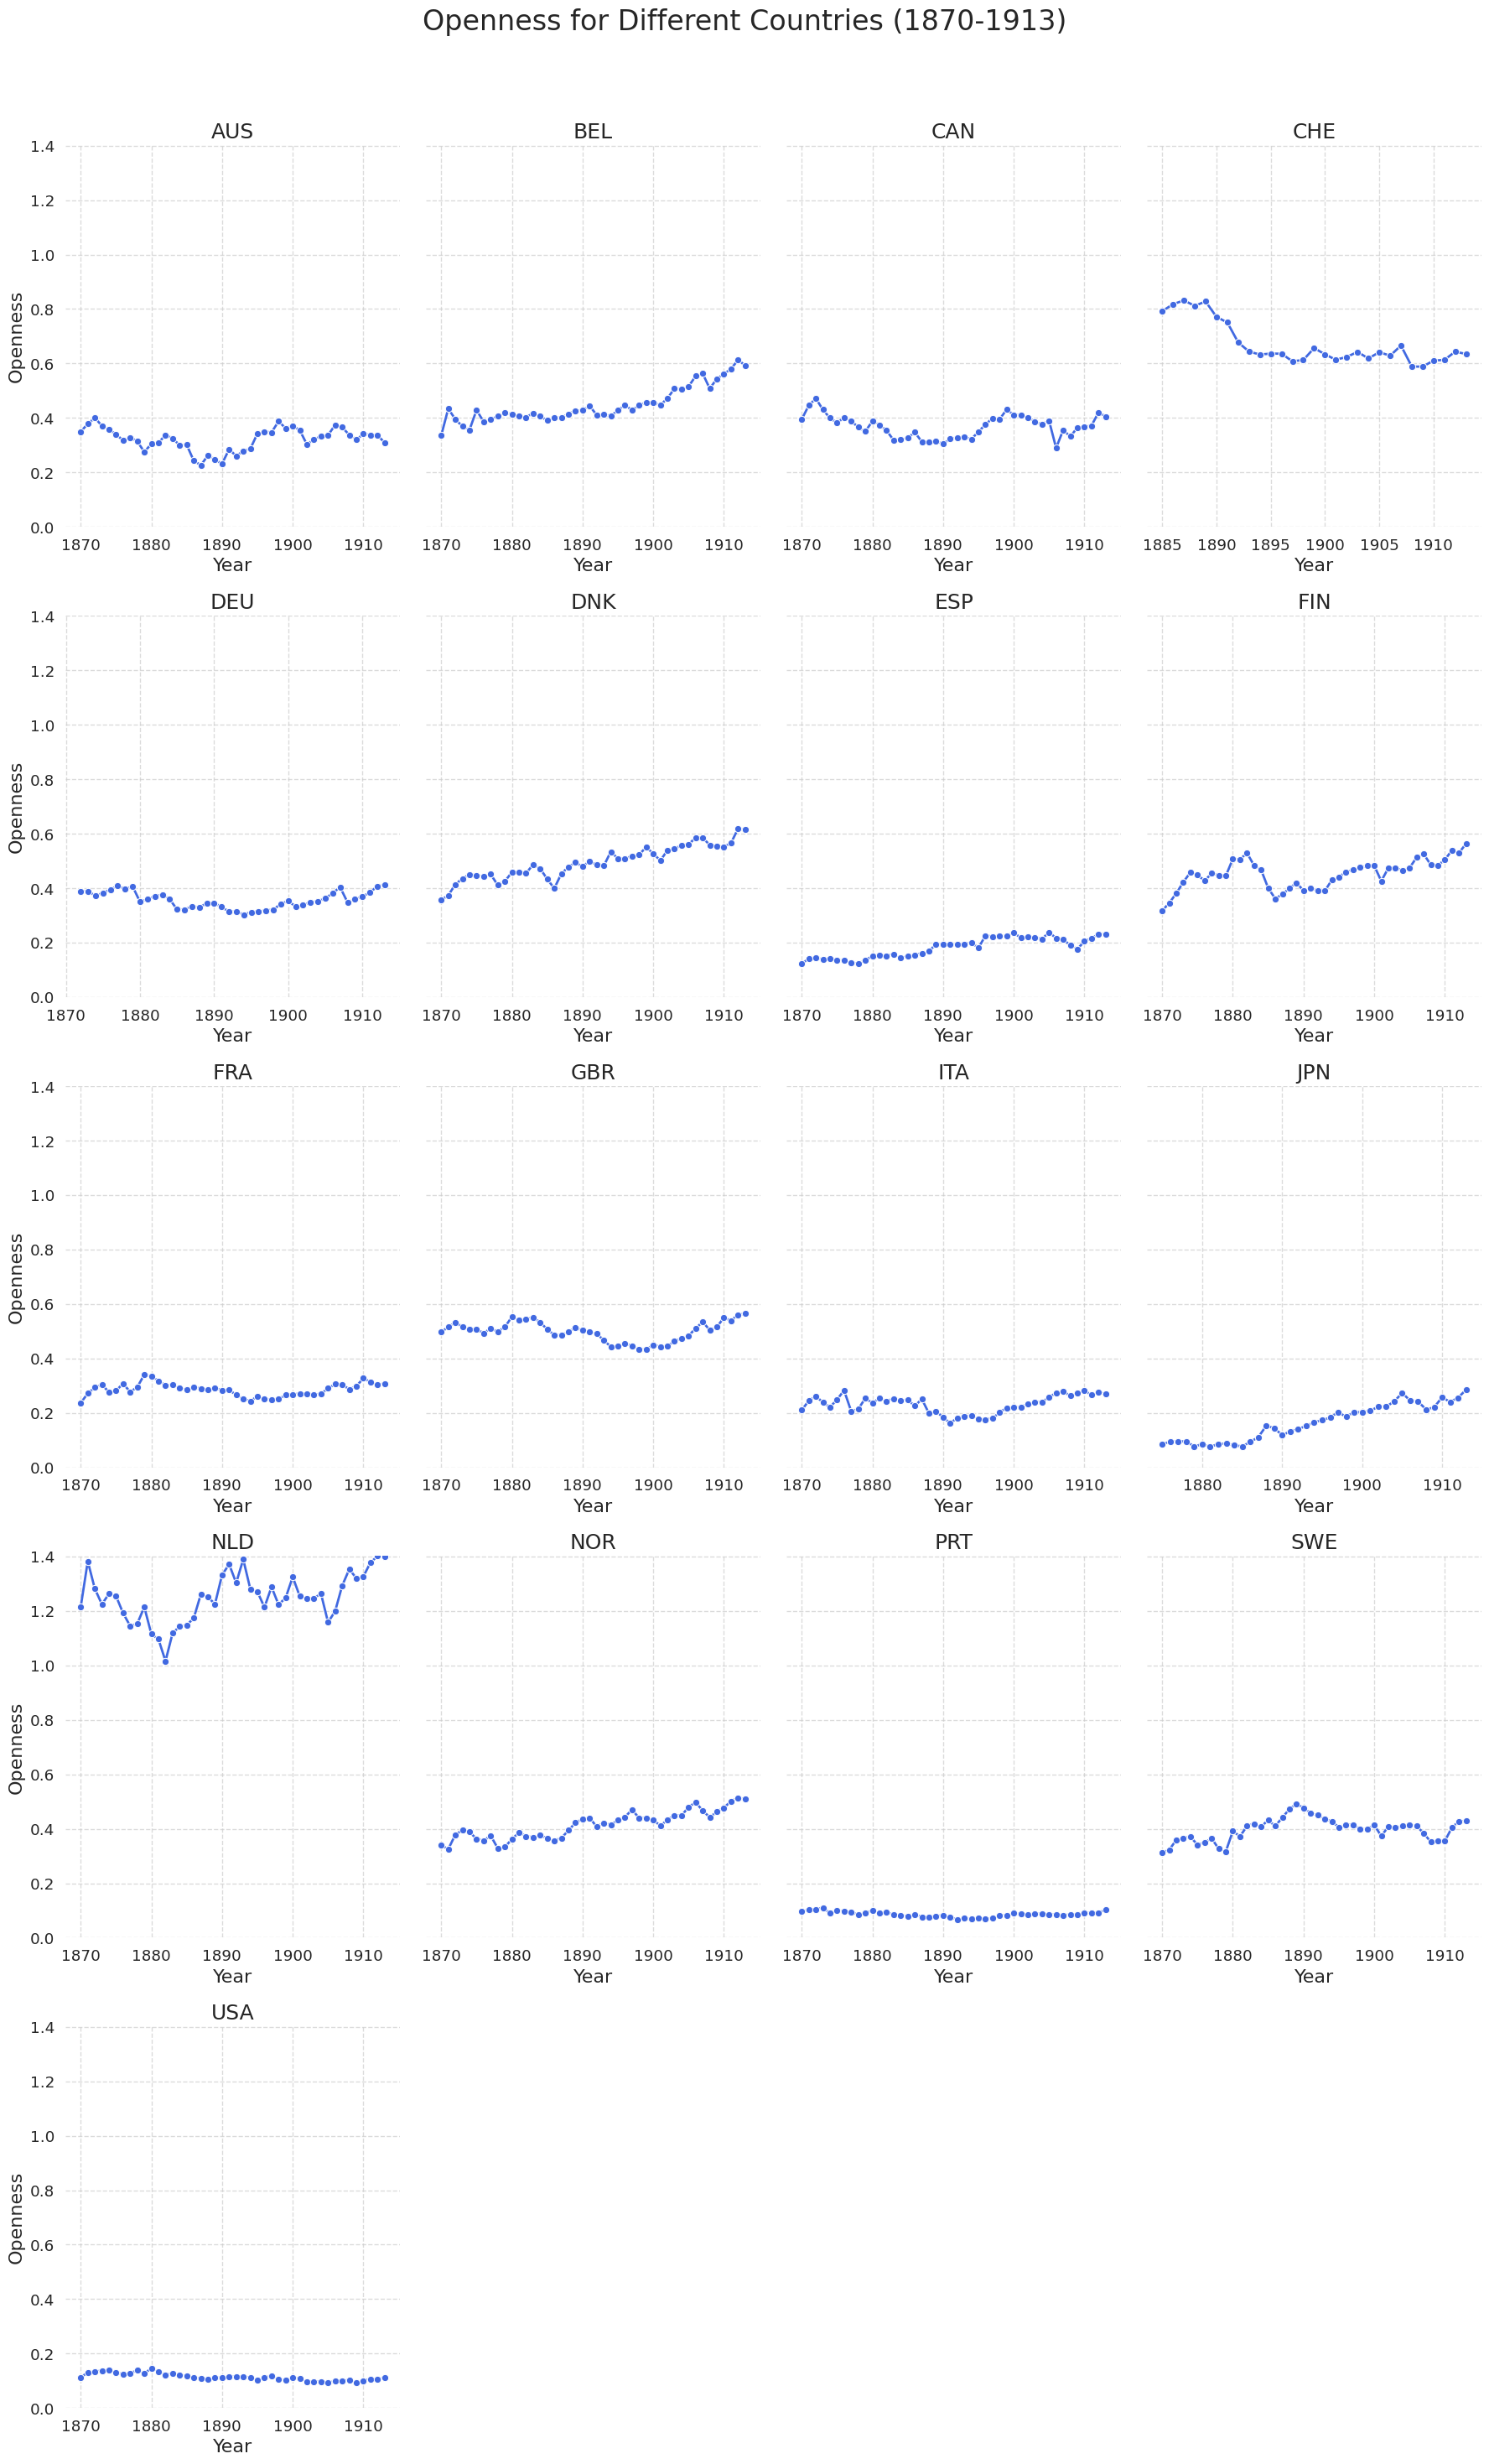

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
min_openness = df_open['openness'].min()
max_openness = df_open['openness'].max()
num_countries = len(df_open['iso'].unique())
num_cols = min(num_countries, 4)
num_rows = (num_countries + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows), sharey=True)
axes = axes.flatten()
for i, (country, group) in enumerate(df_open.groupby('iso')):
  ax = axes[i]


  group = group[group['openness'] != 0]

  sns.lineplot(x='year', y='openness', data=group, marker='o', ax=ax, color='royalblue', linewidth=2)

  ax.set_title(country, fontsize=18)
  ax.set_xlabel('Year', fontsize=16)
  ax.set_ylabel('Openness', fontsize=16)
  ax.grid(True, linestyle='--', alpha=0.7)
  ax.set_ylim(min_openness, max_openness)


  sns.despine(ax=ax, left=True, bottom=True)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Openness for Different Countries (1870-1913)', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

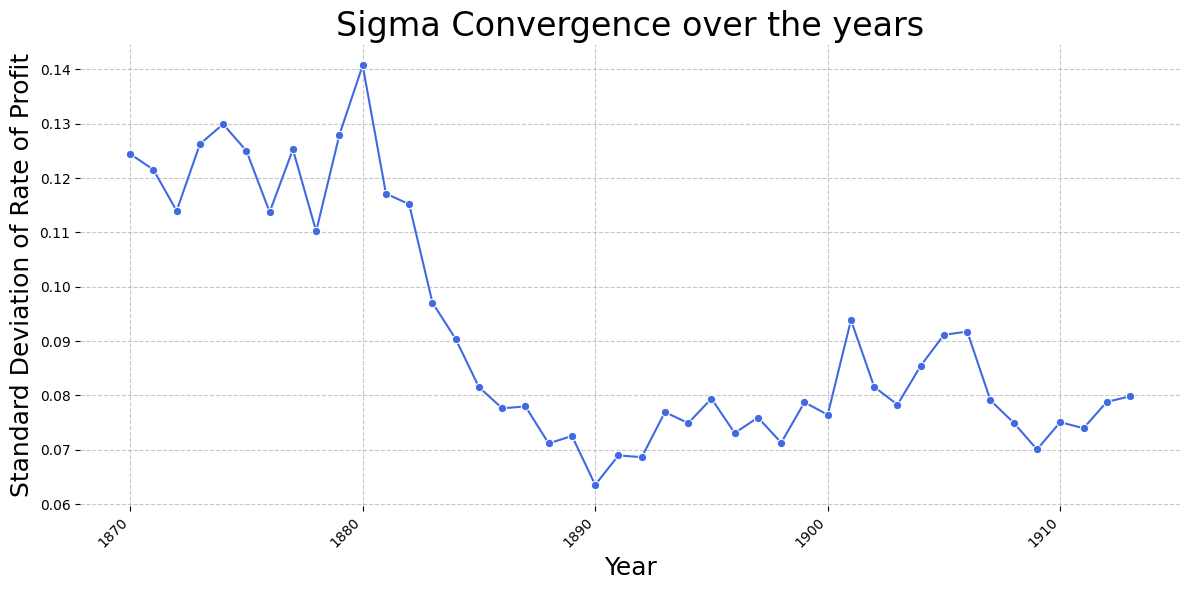

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create sample data (since we don't have the original dataframe)
years = range(2000, 2021)
rop_std = np.random.normal(10, 2, len(years)) - np.linspace(0, 2, len(years))
df = pd.DataFrame({'Year': years, 'rop': rop_std})

sigma_rop_by_year = df.groupby('Year')['rop'].agg(['mean', 'std']).reset_index()

# Set the style and color palette
plt.style.use('seaborn-whitegrid')
sns.set_palette("coolwarm")

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Add background color
ax.set_facecolor('#f0f0f0')

# Plot the line with gradient
line = ax.plot(sigma_rop_by_year['Year'], sigma_rop_by_year['mean'], linewidth=3, color='#3366cc')
grad = np.linspace(0, 1, len(sigma_rop_by_year))
line[0].set_color(plt.cm.coolwarm(grad))

# Add error bands
ax.fill_between(sigma_rop_by_year['Year'],
                sigma_rop_by_year['mean'] - sigma_rop_by_year['std'],
                sigma_rop_by_year['mean'] + sigma_rop_by_year['std'],
                alpha=0.3, color='#3366cc')

# Customize grid
ax.grid(True, linestyle='--', alpha=0.7, color='#cccccc')

# Set labels and title
ax.set_title('Sigma Convergence over the Years', fontsize=24, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=18, labelpad=10)
ax.set_ylabel('Standard Deviation of Rate of Profit', fontsize=18, labelpad=10)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=45, ha='right')
min_year = sigma_rop_by_year.loc[sigma_rop_by_year['mean'].idxmin(), 'Year']
min_value = sigma_rop_by_year['mean'].min()
ax.annotate(f'Lowest point: {min_year}',
            xy=(min_year, min_value),
            xytext=(min_year-2, min_value+1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Save the plot as a high-resolution image
plt.savefig('sigma_convergence_plot.png', dpi=300, bbox_inches='tight')

print("The plot has been generated and saved as 'sigma_convergence_plot.png'.")

In [ ]:
df_world = pd.read_csv('/content/drive/MyDrive/1st_globalization/world_exports.csv')
df_world

,Entity,Code,Year,World trade based on Maddison (% of GDP) (Klasing and Milionis (2014)),"World trade - upper bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",World trade based on own estimates (% of GDP) (Klasing and Milionis (2014)),"World trade - lower bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",Trade (% of GDP),Trade openness (share of exports and imports in GDP)
0,World,OWID_WRL,1500,NaN,2.25,NaN,0.50000,NaN,NaN
1,World,OWID_WRL,1600,NaN,5.50,NaN,1.25000,NaN,NaN
2,World,OWID_WRL,1700,NaN,5.50,NaN,1.25000,NaN,NaN
3,World,OWID_WRL,1820,NaN,9.50,NaN,2.00000,NaN,NaN
4,World,OWID_WRL,1870,11.76,NaN,NaN,17.57000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13310,Vanuatu,VUT,2022,NaN,NaN,NaN,68.51271,NaN,NaN
13311,Vietnam,VNM,2022,NaN,NaN,NaN,185.72998,NaN,NaN
13312,World,OWID_WRL,2022,NaN,NaN,NaN,62.56355,NaN,NaN
13313,Zambia,ZMB,2022,NaN,NaN,NaN,NaN,69.29732,NaN


In [ ]:
df_world= df_world[df_world['Entity'] == 'World']

,Year
0,1500
1,1600
2,1700
3,1820
4,1870
...,...
12537,2018
12768,2019
12958,2020
13142,2021


In [ ]:
df_world = df_world.sort_values(by='Year', ascending=True)
df_world

,Entity,Code,Year,World trade based on Maddison (% of GDP) (Klasing and Milionis (2014)),"World trade - upper bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",World trade based on own estimates (% of GDP) (Klasing and Milionis (2014)),"World trade - lower bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",Trade (% of GDP),Trade openness (share of exports and imports in GDP)
0,World,OWID_WRL,1500,NaN,2.25,NaN,0.500000,NaN,NaN
1,World,OWID_WRL,1600,NaN,5.50,NaN,1.250000,NaN,NaN
2,World,OWID_WRL,1700,NaN,5.50,NaN,1.250000,NaN,NaN
3,World,OWID_WRL,1820,NaN,9.50,NaN,2.000000,NaN,NaN
4,World,OWID_WRL,1870,11.76,NaN,NaN,17.570000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12537,World,OWID_WRL,2018,NaN,NaN,NaN,57.822994,57.708447,NaN
12768,World,OWID_WRL,2019,NaN,NaN,NaN,55.852898,56.497578,NaN
12958,World,OWID_WRL,2020,NaN,NaN,NaN,52.433937,NaN,NaN
13142,World,OWID_WRL,2021,NaN,NaN,NaN,56.811600,NaN,NaN


In [ ]:
df_world['export_share'] = df_world['World trade - lower bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))']
df_world

,Entity,Code,Year,World trade based on Maddison (% of GDP) (Klasing and Milionis (2014)),"World trade - upper bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",World trade based on own estimates (% of GDP) (Klasing and Milionis (2014)),"World trade - lower bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",Trade (% of GDP),Trade openness (share of exports and imports in GDP),export_share
0,World,OWID_WRL,1500,NaN,2.25,NaN,0.500000,NaN,NaN,0.500000
1,World,OWID_WRL,1600,NaN,5.50,NaN,1.250000,NaN,NaN,1.250000
2,World,OWID_WRL,1700,NaN,5.50,NaN,1.250000,NaN,NaN,1.250000
3,World,OWID_WRL,1820,NaN,9.50,NaN,2.000000,NaN,NaN,2.000000
4,World,OWID_WRL,1870,11.76,NaN,NaN,17.570000,NaN,NaN,17.570000
...,...,...,...,...,...,...,...,...,...,...
12537,World,OWID_WRL,2018,NaN,NaN,NaN,57.822994,57.708447,NaN,57.822994
12768,World,OWID_WRL,2019,NaN,NaN,NaN,55.852898,56.497578,NaN,55.852898
12958,World,OWID_WRL,2020,NaN,NaN,NaN,52.433937,NaN,NaN,52.433937
13142,World,OWID_WRL,2021,NaN,NaN,NaN,56.811600,NaN,NaN,56.811600


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='export_share', data=df_world, palette='viridis', linewidth=2)
plt.axvspan(1870, 1913, color='darkgray', alpha=0.3)
plt.title('World Export Share Over Time', fontsize=24)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Export Share (% of GDP)', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')
plt.text(1890, 50, 'First Age of Globalization', fontsize=14, ha='center', va='center',
         color='darkblue', fontweight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=5))
plt.tight_layout()
plt.show()

In [ ]:
df_dta = pd.read_stata('/content/drive/MyDrive/1st_globalization/ineqImperialism.dta')

In [ ]:
countries_to_remove = []
for country, group in df_dta.groupby('country'):
    if group['NWnfa_shrY'].isnull().all():
        countries_to_remove.append(country)
df_dta_cleaned = df_dta[~df_dta['country'].isin(countries_to_remove)]
df_dta_cleaned

,country,ccode,iso,year,PWnet_shrY,NWnfa_c,NWnfa_shrY,NWgfa_c,NWgfa_shrY,NWgfl_c,...,imp_war,for_bond,for_eq,for_tot,col_bond,col_eq,col_tot,colfor_bond,colfor_eq,colfor_tot
176,Germany,Germany,DEU,1870,703.720000,NaN,0.000000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Germany,Germany,DEU,1871,689.700000,NaN,0.000000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,Germany,Germany,DEU,1872,629.580000,NaN,0.000000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Germany,Germany,DEU,1873,633.140000,NaN,1.483312,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,Germany,Germany,DEU,1874,601.260000,NaN,3.065251,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,United States,US,USA,1909,455.799673,NaN,-14.587763,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,United States,US,USA,1910,437.657995,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,United States,US,USA,1911,467.550849,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,United States,US,USA,1912,458.904713,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


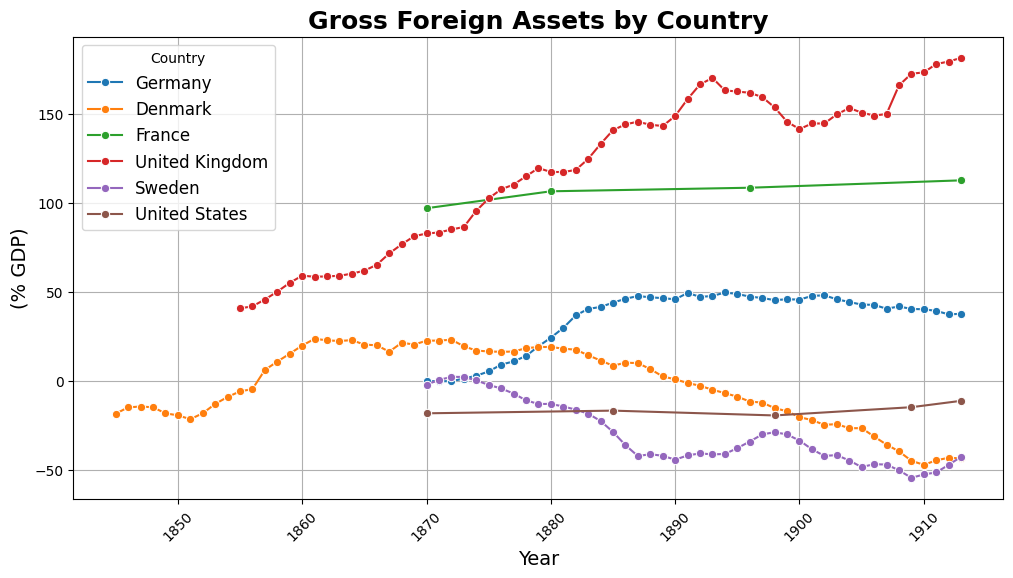

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='NWnfa_shrY', hue='country', data=df_dta_cleaned, marker='o')
plt.title('Gross Foreign Assets by Country',fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('(% GDP)',fontsize=14)
plt.grid(True)
plt.legend(title='Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_dta_cleaned['country'] = df_dta_cleaned['country'].replace('United Kingdom', 'UK')
df_dta_cleaned['country'] = df_dta_cleaned['country'].replace('United States', 'USA')
country_list = df_dta_cleaned['country'].tolist()
print(country_list)

['Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark', 'Denmark'

<ipython-input-6-c6b0a4d39c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dta_cleaned['country'] = df_dta_cleaned['country'].replace('United Kingdom', 'UK')
<ipython-input-6-c6b0a4d39c49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dta_cleaned['country'] = df_dta_cleaned['country'].replace('United States', 'USA')


In [ ]:
merged_df = pd.merge(df,df_dta_cleaned, left_on=['Country', 'Year'], right_on=['country', 'year'], how='left')
merged_df
merged_df.to_excel('merged_data.xlsx', index=False)

ERROR: Error: object 'merged_df' not found


## Regressions (R)

In [ ]:
library(readxl)
df <- read_excel("/content/rop_foreign_assets_merged.xlsx")

In [ ]:
if(!require(plm)){install.packages("plm")}
library(plm)
pdata <- pdata.frame(df, index = c("country", "year"))
fe_model_1 <- plm(rop ~ exp + NWnfa_shrY + kl_index, index = c("country", "year"), data = pdata, model = "within")
fe_model_2 <- plm(rop ~ exp + NWnfa_shrY + kl_index + factor(year), data = pdata, model = "within", effect="individual")
summary(fe_model_1)

Loading required package: plm

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plm’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘bdsmatrix’, ‘collapse’, ‘zoo’, ‘sandwich’, ‘lmtest’, ‘maxLik’, ‘Rdpack’, ‘Formula’


Warning message in install.packages("plm"):
“installation of package ‘collapse’ had non-zero exit status”
Warning message in install.packages("plm"):
“installation of package ‘zoo’ had non-zero exit status”
Warning message in install.packages("plm"):
“installation of package ‘sandwich’ had non-zero exit status”
Warning message in install.packages("plm"):
“installation of package ‘lmtest’ had non-zero exit status”


In [ ]:
colnames(df)

[1] "Country"             "Year"                "openness"           
  [4] "rop"                 "iy"                  "wage"               
  [7] "k/l"                 "kl_index"            "labor"              
 [10] "gdp_x"               "Fixed_capital_stock" "prod"               
 [13] "hours"               "GDP"                 "asli_labor"         
 [16] "CPI"                 "real_wage"           "wage_index"         
 [19] "prod_index"          "exp"                 "Column 1"           
 [22] "Column 2"            "country"             "ccode"              
 [25] "iso"                 "year"                "PWnet_shrY"         
 [28] "NWnfa_c"             "NWnfa_shrY"          "NWgfa_c"            
 [31] "NWgfa_shrY"          "NWgfl_c"             "NWgfl_shrY"         
 [34] "cpi"                 "NWnet_c"             "NWnet_shrY"         
 [37] "gdpgbp"              "polity2"             "gdppc_1990"         
 [40] "irst"                "milex"               "milper"             
 [43] "pec"                 "tpop"                "upop"               
 [46] "cinc"                "version"             "milpercap"          
 [49] "lnmilpercap"         "lngdppc"             "lnmilexpgdp"        
 [52] "eq"                  "req"                 "bond"               
 [55] "rbond"               "gdp_y"               "gdppc"              
 [58] "colo_exp"            "colo_imp"            "noncolo_exp"        
 [61] "noncolo_imp"         "colo_bal"            "noncolo_bal"        
 [64] "colo_realbal"        "noncolo_realbal"     "diff"               
 [67] "obca"                "nfi"                 "gdfi"               
 [70] "ii"                  "gna"                 "gnp"                
 [73] "gps"                 "gna_y"               "e_gna_y"            
 [76] "nfi_y"               "obca_y"              "e_nfi_y"            
 [79] "gdfi_y"              "e_gps"               "forR_mfr"           
 [82] "forR"                "eqR_mfr"             "eqR"                
 [85] "bR_mfr"              "bR"                  "eqPindex_wgtd"      
 [88] "bPindex_wgtd"        "rf"                  "r_rbond"            
 [91] "er_rbond"            "top1nw"              "top1y"              
 [94] "top10nw"             "top10y"              "colo_war"           
 [97] "imp_war"             "for_bond"            "for_eq"             
[100] "for_tot"             "col_bond"            "col_eq"             
[103] "col_tot"             "colfor_bond"         "colfor_eq"          
[106] "colfor_tot"